<a href="https://colab.research.google.com/github/roryzhengzhang/HAICOR_v3_baseline/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv( "log_data.csv", header = 0, index_col="id")
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 400)
df = df.drop("op sequence", 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


## Path modification log table

In [54]:
df

,original path,resulting path,duration,create from scratch,operation sequence
id,,,,,
36a52f1a-8413-4a63-a2d9-855583f73f04,leftover related to remaining synonym rest,leftover related to remaining synonym Belonging;,1:20,False,modify node: rest to Belonging
98747b8a-a142-4792-b734-319f993b4be6,leftover is a remainder related to possession related to belonging,friends hasPrerequisite acceptance entails belonging,4:32,True,delete node: remainder; delete node: leftover; delete node: possession; new node creation: friends; new node creation: acceptance; new node creation: belonging; new link creation: acceptance related to entails; new link creation: acceptance entails belonging; modify link: acceptance entails belonging; new link creation: friends hasPrerequisite acceptance; modify link: friends hasPrerequisite a...
49966290-7848-4d8d-8617-fc7d6b57983e,pretend motivated by goal playing used for competing causes competition,pretend motivated by goal mask the truth;,1:34,False,delete node: pretend; delete node: competing; delete node: competition; modify node: playing to mask the truth
60054ea6-0ad9-42d1-9cd0-885a6a86a34e,leftover related to remaining synonym rest,Friendship related to Belonging; Friendship related to Approval;,8:10,True,new node creation: Friendship; new node creation: Excluding; new node creation: Belonging; new link creation: Friendship related to Belonging; new node creation: Approval; new link creation: Friendship related to Belonging; new link creation: Friendship related to Approval; delete link: Friendship to related to Belonging;
dcf832b0-2e7b-4a8b-b52e-e5cd112b3ca3,leftover is a remainder related to possession related to belonging,leftover is a remainder related to possession related to belonging;,0:10,False,NaN
3efd677f-b67a-481d-9a94-a41b5d57e426,pretend motivated by goal playing used for competing causes competition,pretended related to ignore motivated by goal approval;,10:47,True,new node creation: grateful; delete node: grateful; new node creation: pretended; new node creation: approval; new node creation: acceptance; new link creation: acceptance related to pretended; delete link: acceptance to related to pretended; new link creation: acceptance related to pretended; modify link: acceptance related to pretended; new node creation: fake; delete node: acceptance; delet...
f0ed3e0b-d2dc-4659-978a-f34549bbbdb6,pretend motivated by goal playing used for competing causes competition,pretend motivated by goal make someone happy; make someone happy used for maintain friendship; maintain friendship causes social needs;,1:10,False,modify node: playing to make someone happymodify node: competing to maintain friendshipmodify node: competition to social needs
a9638a74-e739-481a-bcd0-aae445f49182,leftover related to remaining synonym rest,leftover related to remaining; remaining synonym rest;,0:02,False,NaN
67e6b483-1aae-4ba5-b251-aa5ee1481fad,pretend motivated by goal actor is a person desires independent,pretend related to actor; conceal motivated to actor;,4:27,False,delete node: independent; new node creation: Conceal ; delete link: actor to is a person; delete node: person; new link creation: actor related to Conceal; new link creation: Conceal related to person; new link creation: actor related to Concea;; new link creation: Conceal related to actor; modify link: Conceal related to actor; modify link: pretend related to actor; modify link: pretend re...


## Path quality evaluation

In this section, we evaluate path quality from two perspectives:

1. Rationality of the argument that path stands for
2. Internal semantic coherence of path

### Rationality
We assess three rationality metrics of path (*acceptability, relevance, sufficiency*) based on Blair's theory of argument rationality, where we treat path as the premise that supports the human needs that the path arrives at. For each metric, evaluators need to answer the following 5-Likert scale questions:
- **Acceptability**: 
 - A1: How acceptable is a path (premise) to you? In other words, how plausible is a path to you?
- **Relevance**: 
  - R1: How much is a path worthy of being taken as evidence to the conclusion (predicted human needs)? 
  - R2: How likely do you take this path as evidential support to the conclusion?
- **Sufficiency** 
  - S1: How sufficient is a path to support the conclusion? 
  - S2: How close is a path to the reasoning that you imagine most people will make to answer the same story question?

### Semantic coherence
For internal semantic coherence, we consider how many concepts maintain a consistent sense along the path. It is because that the implicit change of word sense will impair the reasonableness of the path.

We define the semantic coherence of a path as:
$$
  \frac{\sum{w_{i}}}{\text{number of intermediate concepts}}
$$
Where $w_{i} \in \{0, 1\}$ represents whether or not concept $i$ maintains a consistent word sense along the path (except the beginning and ending words). 

## Quality evaluation table
| ID | original path | A1 | R1 | R2 | S1 | S2 | SC | modified path | A1 | R1 | R2 | S1 | S2 | SC |
| --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | leftover related to remaining synonym rest |  1 | 1 | 1 | 1 | 1 | 0.0 | leftover related to remaining synonym Belonging | 1 | 1 | 1 | 1 | 1 | 0.0 |
| 2 | leftover is a remainder related to possession related to belonging	 |  1 | 1 | 1 | 1 | 1 | 0.5 | friends hasPrerequisite acceptance entails belonging | 2 | 2 | 2 | 1 | 1 | 1 |
| 3 | pretend motivated by goal playing used for competing causes competition		 |  1 | 1 | 1 | 1 | 1 | 0.5 | pretend motivated by goal mask the truth (didn't end up with a human needs) | 3 | 1 | 2 | 2 | 1 | 1 |
| 4 | leftover related to remaining synonym rest |  1 | 1 | 1 | 1 | 1 | 0.0 | Friendship related to Belonging; Friendship related to Approval;	|2 | 2 | 2 | 2 | 2 | 1 |
| 5 | pretend motivated by goal playing used for competing causes competition	 |  1 | 1 | 1 | 1 | 1 | 0.5 | pretended related to ignore motivated by goal approval;	 | 3 | 2 | 2 | 2 | 2 | 1 |
| 6 | pretend motivated by goal playing used for competing causes competition	 |  1 | 1 | 1 | 1 | 1 | 0.5 | pretend motivated by goal make someone happy used for maintain friendship causes social needs; | 3 | 4 | 4 | 4 | 4 | 1 |
| 7 | leftover related to remaining synonym rest	 |  1 | 1 | 1 | 1 | 1 | 0.0 | May made a friendship bracelet is a Friendship bracelet is a nice thing; Friendship bracelet is a nice thing cause Gina pretend to be grateful; Grateful cause Gina pretend to be grateful; it's expected to thank people who did nice things to you related to Grateful;	 | 4 | 4 | 5 | 4 | 4 | 1 |
| 8 | leftover is a remainder related to possession related to belonging	 |  1 | 1 | 1 | 1 | 1 | 0.5 | friendship related to belonging;	 | 2 | 1 | 2 | 2 | 2 | 1 |
| 9 | leftover is a remainder related to possession related to belonging	 |  1 | 1 | 1 | 1 | 1 | 0.5 | friendship related to belonging;	 | 2 | 1 | 2 | 2 | 2 | 1 |
| 10 | leftover related to remaining synonym rest |  1 | 1 | 1 | 1 | 1 | 0.5 | leftover related to remaining synonym waste | 1 | 1 | 1 | 1 | 1 | 1 |
| 11 | leftover related to remaining synonym rest |  1 | 1 | 1 | 1 | 1 | 0.5 | leftover related to remaining synonym belonging; | 1 | 1 | 1 | 1 | 1 | 0.0 |


## Statistical test of path quality

In [45]:
import scipy.stats as stats

data_original = {'A1': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
                 'R1':  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
                 'R2':  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 'S1':  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 'S2':  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 'SC': [0, 0.5, 0.5, 0, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5]}

data_modified = {'A1': [1, 2, 3, 2, 3, 3, 4, 2, 2, 1, 1], 
                 'R1':  [1, 2, 1, 2, 2, 4, 4, 1, 1, 1, 1], 
                 'R2':  [1, 2, 2, 2, 2, 4, 5, 2, 2, 1, 1],
                 'S1':  [1, 1, 2, 2, 2, 4, 4, 2, 2, 1, 1],
                 'S2':  [1, 1, 1, 2, 2, 4, 4, 2, 2, 1, 1],
                 'SC': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]}

df_op = pd.DataFrame(data=data_original)
df_mp = pd.DataFrame(data=data_modified)

print("Paired sample t test: ")
#paired t test
A1_test = stats.ttest_rel(df_op['A1'], df_mp['A1'])
print(f"Acceptability Q1: t value: {A1_test[0]}, p value: {A1_test[1]}")

R1_test = stats.ttest_rel(df_op['R1'], df_mp['R1'])
print(f"Relevance Q1: t value: {R1_test[0]}, p value: {R1_test[1]}")

R2_test = stats.ttest_rel(df_op['R2'], df_mp['R2'])
print(f"Relevance Q2: t value: {R2_test[0]}, p value: {R2_test[1]}")

S1_test = stats.ttest_rel(df_op['S1'], df_mp['S1'])
print(f"Sufficiency Q1: t value: {S1_test[0]}, p value: {S1_test[1]}")

S2_test = stats.ttest_rel(df_op['S2'], df_mp['S2'])
print(f"Sufficiency Q2: t value: {S2_test[0]}, p value: {S2_test[1]}")

SC_test = stats.ttest_rel(df_op['SC'], df_mp['SC'])
print(f"Semantic coherence: t value: {SC_test[0]}, p value: {SC_test[1]}")

Paired sample t test: 
Acceptability Q1: t value: -3.9929182594206827, p value: 0.0025472722254991334
Relevance Q1: t value: -2.3237900077244507, p value: 0.04249750171368149
Relevance Q2: t value: -3.1345783441076787, p value: 0.010607546331476012
Sufficiency Q1: t value: -3.0276503540974917, p value: 0.01272809802076543
Sufficiency Q2: t value: -2.6537244621713763, p value: 0.024158120327844316
Semantic coherence: t value: -3.6273812505500582, p value: 0.004632630835317806


### Conclusion

It is hard to perform effective evaluation for original paths, since almost all of them are nearly non-sensical. For human-modified paths, some of them still sounds irrational or irrelevant to context (e.g. 1, 10, 11). Besides, some users performed a lazy modification such as directly linking keyword to one of human needs or merely change the ending concept (e.g. 1, 8, 9 ,10, 11). In addition, a few users failed to conclude with a human need in their modified path (e.g. 3, 7, 10).

Two users managed to modify the paths into a rational-sounding one (e.g. 6, 7), although they didn't strictly follow the format requirement (where a node has to be a concept), it implies that traditional relation path may restrict user from producing the reasoning that they are meant to express.

### statistical analysis
Based on my subjective evaluation, paired $t$ test found that human-modiifed paths are better than original paths across every metrics (each metric has negative t value and p-value < 0.05)

## How many people choose to create path from scratch? 

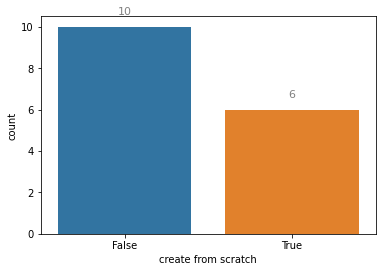

In [46]:
df_group = df.groupby("create from scratch").size().reset_index(name="count")
df_group

f, ax = plt.subplots(1, 1)
ax = sns.barplot(ax=ax, x="create from scratch", y="count", data=df_group)

for p in ax.patches:
  #p.get_height == count
  #xytext is the relative corr to the corrdinate of anonotation
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='gray', xytext=(0, 15),
        textcoords='offset points')

## Summary of survey data

In [47]:
df_survey = pd.read_csv("survey.csv", header=0, index_col=0)
df_survey

,Q1: How rational is the AI reasoning in your opinion?,Q2: How easy is it for you to use the graphical tool?,Q3: Do you have any suggested features that you think system should implement in the future?,"Q4: If you encounter any difficulty as modifying AI reasoning, could you briefly state what it is?",Q5: Do you have any feedback on the usability of this system?
ID,,,,,
3efd677f-b67a-481d-9a94-a41b5d57e426,Somewhat_rational,Hard_to_tell,drop downs so you could choose from the selected list of needs and relations,NaN,NaN
7f782e16-ce6e-4455-a19f-a67237eca938,Hard_to_tell,Very_difficult,Too much text to read.,NaN,Gamify it.
8f7f7e60-e3a1-46f8-beb1-2742d1d332e5,Somewhat_irrational,Hard_to_tell,Maybe add emotion to each relation to show if that relation produced something positive or negative?,I did not realize that user would modify just one reasoning. I might have picked a different one if I knew that,Already very easy to use. The instructions on the beginning might be too much too consume.
36a52f1a-8413-4a63-a2d9-855583f73f04,Hard_to_tell,Somewhat_easy,allow the use to provide sentence level reasoning,using single concept to explain underlying reasoning is very limited,Select from existing node/link instead of typing
52c5809f-7e71-4e6a-86f7-0e2181eebc2b,Somewhat_irrational,Hard_to_tell,NaN,NaN,NaN
67e6b483-1aae-4ba5-b251-aa5ee1481fad,Hard_to_tell,Somewhat_easy,Looks good!,"Humans aren't perfect at reasoning either so for more complex situations, it might be difficult to train AI reasoning since people themselves don't agree or reason \""correctly\"" (if there is even such a thing) themselves.","Is there only a specific way the arrows can go? I noticed that i couldn't change the direction of the arrows even when i created the link from both nodes each time. It only got created for the node which didn't have any other links associated.\r\n\r\nFor this feedback system, we can either pick answers for 2 or 3."
73c4b678-7da0-460e-a101-69fc63c5bf16,Somewhat_irrational,Somewhat_difficult,NaN,NaN,it was easier the second time
78d9434d-b886-4d48-8f86-dc3f935e1ab6,Somewhat_rational,Somewhat_easy,NaN,NaN,NaN
143db38a-9d2d-44ed-a1d1-ab7d5bff608a,Somewhat_rational,Somewhat_easy,NaN,NaN,NaN


##Q1: How rational is the AI reasoning in your opinion?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


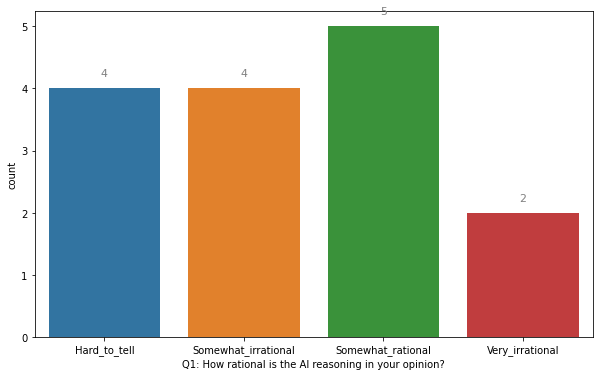

In [48]:
#count the answer of Q1
f, ax = plt.subplots(1, 1)
f.set_size_inches(10, 6)
df_survey_q1 = df_survey.groupby(["Q1: How rational is the AI reasoning in your opinion?"]).size().reset_index(name="count")
ax = sns.barplot("Q1: How rational is the AI reasoning in your opinion?", "count", data=df_survey_q1, ax=ax)

for p in ax.patches:
  #p.get_height == count
  #xytext is the relative corr to the corrdinate of anonotation
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='gray', xytext=(0, 15),
        textcoords='offset points')

## Q2: How easy is it for you to use the graphical tool?
The data collected for Q2 is noisy since I forgot to change the "choice id" as I created Q3 by modifying a copy of Q2 :( 

Sadly, I cannot distinguish whether people was answering Q2 or Q3 based on the collected data.

##Q4: Do you have any suggested features that you think system should implement in the future?

### Feedback:

### 1. Better display of relation types and human needs
- "drop downs so you could choose from the selected list of needs and relations"
- "Maybe add emotion to each relation to show if that relation produced something positive or negative?"

### 2. Improvement of instruction
- "Too much text to read."
- "Show an interactive sample - a video? It's a little hard to understand the task through the directions, even after reading them twice."
- "Maybe suggest which words you can modify within the node (ex. should the words you add to a node only be within the context of the story?) These needs could be on the side left column to be more accessible, instead of the click button."

### 3. Better display and interaction of AI reasoning
- "allow the use to provide sentence level reasoning"
- "I really don't think the paths generated by AI make much sense"

## Q5: If you encounter any difficulty as modifying AI reasoning, could you briefly state what it is?
### Feedback:
- "I did not realize that user would modify just one reasoning. I might have picked a different one if I knew that"
- "using single concept to explain underlying reasoning is very limited"
- "Humans aren't perfect at reasoning either so for more complex situations, it might be difficult to train AI reasoning since people themselves don't agree or reason "correctly" (if there is even such a thing) themselves."
- "select one rationale path to edit"

## Q6: Do you have any feedback on the usability of this system?
### Feedback:
- "Already very easy to use. The instructions on the beginning might be too much too consume."
- "Select from existing node/link instead of typing"
- "Is there only a specific way the arrows can go? I noticed that i couldn't change the direction of the arrows even when i created the link from both nodes each time. It only got created for the node which didn't have any other links associated. For this feedback system, we can either pick answers for 2 or 3."
- "it was easier the second time"
- "The interface for modifying reasoning is great. Very fluid and intuitive."
- "It was not clear on what to do"
- "The first several pages are too overwhelming. There is no tutorial in the path modification page"
- "mini survey would not let me answer both question 2 and question 3"